In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Impostazioni per i grafici
plt.style.use('default')
sns.set_palette("husl")

# Dataset Loading and Pre Processing

In [9]:
df = pd.read_csv('./rsc/Mall_Customers.csv')
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...           

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
print(X.describe())

       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


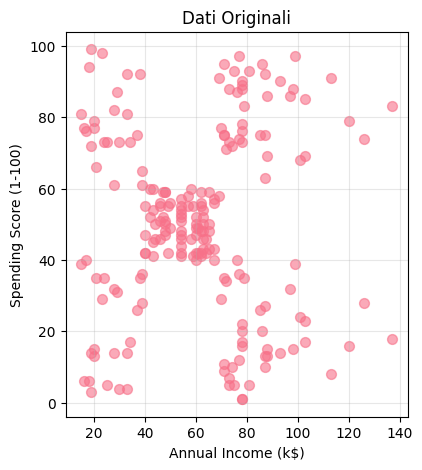

In [11]:
# Visualizzazione dei dati originali
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], alpha=0.6, s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Dati Originali')
plt.grid(True, alpha=0.3)

# Standardizza i dati per DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])

# Finding Best N. of Clusters for KMeans

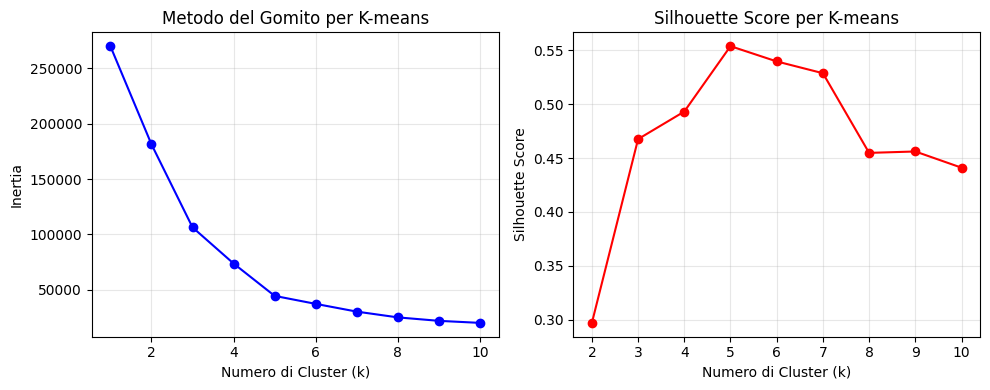

In [12]:
# Determina il numero ottimale di cluster per K-means usando il metodo del gomito
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Grafico del gomito
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito per K-means')
plt.grid(True, alpha=0.3)

# Calcola silhouette score per diversi k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per K-means')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# print("Silhouette Scores per K-means:")
# for i, score in enumerate(silhouette_scores, 2):
#     print(f"k={i}: {score:.3f}")

# Clustering with KMeans and DBSCAN

In [13]:
# Applica K-means con k ottimale (solitamente 5 per questo dataset)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Applica DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Aggiungi le etichette al dataframe
df_results = X.copy()
df_results['KMeans_Cluster'] = kmeans_labels
df_results['DBSCAN_Cluster'] = dbscan_labels

print(f"K-means: {len(np.unique(kmeans_labels))} cluster")
print(f"DBSCAN: {len(np.unique(dbscan_labels))} cluster (incluso il rumore: {np.sum(dbscan_labels == -1)} punti)")

K-means: 5 cluster
DBSCAN: 3 cluster (incluso il rumore: 8 punti)


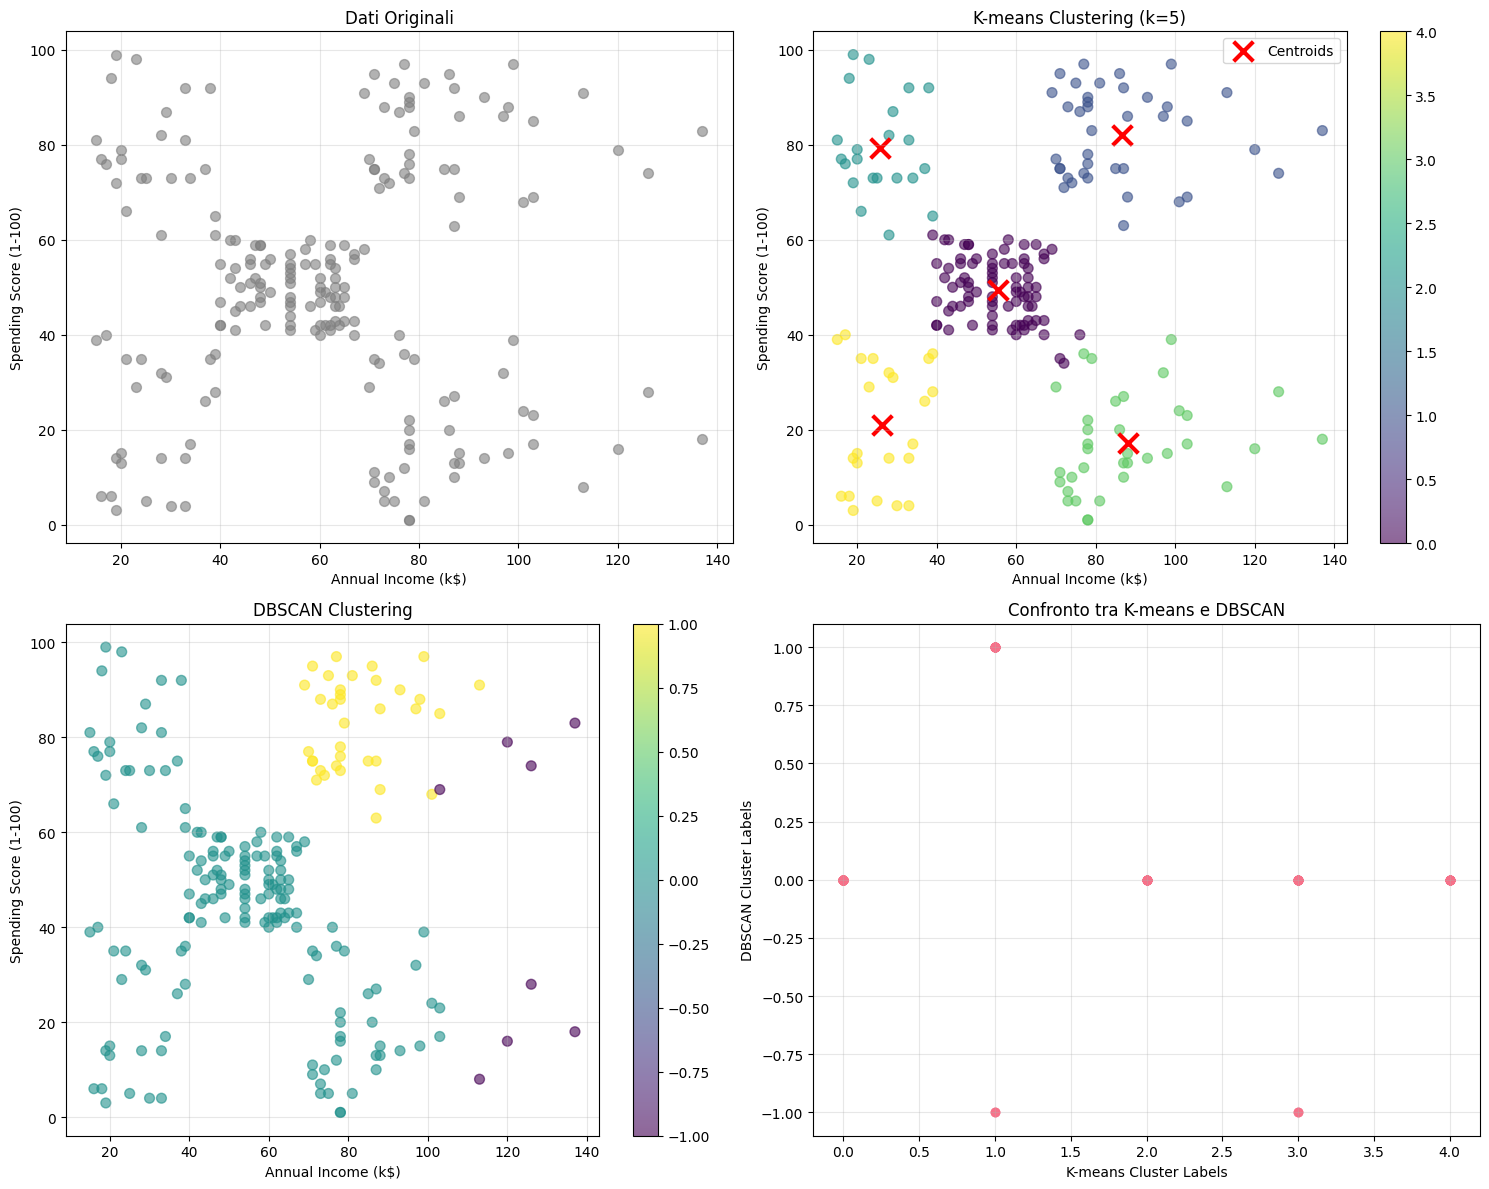

In [ ]:
# Visualizzazione completa dei risultati
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Dati originali
axes[0, 0].scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
                   alpha=0.6, s=50, c='gray')
axes[0, 0].set_xlabel('Annual Income (k$)')
axes[0, 0].set_ylabel('Spending Score (1-100)')
axes[0, 0].set_title('Dati Originali')
axes[0, 0].grid(True, alpha=0.3)

# K-means risultati
scatter_kmeans = axes[0, 1].scatter(
    X['Annual Income (k$)'], X['Spending Score (1-100)'], 
    c=kmeans_labels, cmap='viridis', alpha=0.6, s=50
)
axes[0, 1].scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
    c='red', marker='x', s=200, linewidths=3, label='Centroids'
)
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Spending Score (1-100)')
axes[0, 1].set_title(f'K-means Clustering (k={optimal_k})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter_kmeans, ax=axes[0, 1])

# DBSCAN risultati
scatter_dbscan = axes[1, 0].scatter(
    X['Annual Income (k$)'], X['Spending Score (1-100)'], 
    c=dbscan_labels, cmap='viridis', alpha=0.6, s=50
)
axes[1, 0].set_xlabel('Annual Income (k$)')
axes[1, 0].set_ylabel('Spending Score (1-100)')
axes[1, 0].set_title('DBSCAN Clustering')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter_dbscan, ax=axes[1, 0])

# Confronto tra i due algoritmi
axes[1, 1].scatter(kmeans_labels, dbscan_labels, alpha=0.6)
axes[1, 1].set_xlabel('K-means Cluster Labels')
axes[1, 1].set_ylabel('DBSCAN Cluster Labels')
axes[1, 1].set_title('Confronto tra K-means e DBSCAN')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyses

In [36]:
df_grouped_kmeans = df_results.drop(columns=['DBSCAN_Cluster']).groupby('KMeans_Cluster').mean()#.reset_index()
# add mean distance between cluster centroid and samples in that cluster
df_grouped_kmeans['Mean Distance to Centroid'] = df_results.groupby('KMeans_Cluster').apply(
    lambda x: 
    np.mean(
        np.linalg.norm(
            x[['Annual Income (k$)', 'Spending Score (1-100)']].values
            - df_grouped_kmeans.loc[x.name, ['Annual Income (k$)', 'Spending Score (1-100)']].values
            , axis=1
        ),
    axis=0
))
print(df_grouped_kmeans.sort_values(by=['Annual Income (k$)', 'Spending Score (1-100)'], ascending=[False, False]))

                Annual Income (k$)  Spending Score (1-100)  \
KMeans_Cluster                                               
3                        88.200000               17.114286   
1                        86.538462               82.128205   
0                        55.296296               49.518519   
4                        26.304348               20.913043   
2                        25.727273               79.363636   

                Mean Distance to Centroid  
KMeans_Cluster                             
3                               16.267413  
1                               16.340874  
0                               10.066005  
4                               14.212877  
2                               11.596781  


C:\Users\XT144AC\AppData\Local\Temp\ipykernel_2168\2678227077.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped_kmeans['Mean Distance to Centroid'] = df_results.groupby('KMeans_Cluster').apply(


In [23]:
df_grouped_dbscan = df_results.drop(columns=['KMeans_Cluster']).groupby('DBSCAN_Cluster').mean()#.reset_index()
print(df_grouped_dbscan.sort_values(by=['Annual Income (k$)', 'Spending Score (1-100)'], ascending=[False, False]))

                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                      122.750000               46.875000
 1                       82.542857               82.800000
 0                       52.490446               43.101911


In [25]:
print(f"Silhouette Score K-means: {silhouette_score(X, kmeans_labels):.3f}")

# Silhouette score per DBSCAN (escludendo il rumore)
if len(unique_labels) > 1 and not all(dbscan_labels == -1):
    mask = dbscan_labels != -1
    if np.sum(mask) > 1:
        print(f"Silhouette Score DBSCAN: {silhouette_score(X[mask], dbscan_labels[mask]):.3f}")

Silhouette Score K-means: 0.554
Silhouette Score DBSCAN: 0.387
